In [1]:
import scaffolding
from collections import defaultdict

year = None
month = None
program = "usaid-laos-ev"
study_type = "study"
mode_of_interest = "e-bike"
include_test_users = False #NO TEST USERS

Connecting to database URL mongodb://db/openpath_prod_usaid_laos_ev


In [2]:
# dependencies
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set()
%matplotlib inline

params = {'legend.fontsize': 'small',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)


import importlib

In [7]:
dynamic_labels = {
    "MODE": [
      {"value":"walk", "baseMode":"WALKING", "met_equivalent":"WALKING", "kgCo2PerKm": 0},
      {"value":"e-auto_rickshaw", "baseMode":"MOPED", "met_equivalent":"IN_VEHICLE", "kgCo2PerKm": 0.085416859},
      {"value":"auto_rickshaw", "baseMode":"MOPED", "met_equivalent":"IN_VEHICLE", "kgCo2PerKm": 0.231943784},
      {"value":"motorcycle", "baseMode":"MOPED", "met_equivalent":"IN_VEHICLE", "kgCo2PerKm": 0.113143309},
      {"value":"e-bike", "baseMode":"E_BIKE", "met": {"ALL": {"range": [0, -1], "mets": 4.9}}, "kgCo2PerKm": 0.00728},
      {"value":"bike", "baseMode":"BICYCLING", "met_equivalent":"BICYCLING", "kgCo2PerKm": 0},
      {"value":"drove_alone", "baseMode":"CAR", "met_equivalent":"IN_VEHICLE", "kgCo2PerKm": 0.22031},
      {"value":"shared_ride", "baseMode":"CAR", "met_equivalent":"IN_VEHICLE", "kgCo2PerKm": 0.11015},
      {"value":"e_car_drove_alone", "baseMode":"E_CAR", "met_equivalent":"IN_VEHICLE", "kgCo2PerKm": 0.08216},
      {"value":"e_car_shared_ride", "baseMode":"E_CAR", "met_equivalent":"IN_VEHICLE", "kgCo2PerKm": 0.04108},
      {"value":"taxi", "baseMode":"TAXI", "met_equivalent":"IN_VEHICLE", "kgCo2PerKm": 0.30741},
      {"value":"bus", "baseMode":"BUS", "met_equivalent":"IN_VEHICLE", "kgCo2PerKm": 0.20727},
      {"value":"train", "baseMode":"TRAIN", "met_equivalent":"IN_VEHICLE", "kgCo2PerKm": 0.12256},
      {"value":"free_shuttle", "baseMode":"BUS", "met_equivalent":"IN_VEHICLE", "kgCo2PerKm": 0.20727},
      {"value":"air", "baseMode":"AIR", "met_equivalent":"IN_VEHICLE", "kgCo2PerKm": 0.09975},
      {"value":"not_a_trip", "baseMode":"UNKNOWN", "met_equivalent":"UNKNOWN", "kgCo2PerKm": 0},
      {"value":"other", "baseMode":"OTHER", "met_equivalent":"UNKNOWN", "kgCo2PerKm": 0}
    ],
    "PURPOSE": [
      {"value":"home"},
      {"value":"work"},
      {"value":"at_work"},
      {"value":"school"},
      {"value":"transit_transfer"},
      {"value":"shopping"},
      {"value":"meal"},
      {"value":"pick_drop_person"},
      {"value":"pick_drop_item"},
      {"value":"personal_med"},
      {"value":"access_recreation"},
      {"value":"exercise"},
      {"value":"entertainment"},
      {"value":"religious"},
      {"value":"other"}
    ],
    "translations": {
      "en": {
        "walk": "Walk",
        "e-auto_rickshaw":"E-tuk tuk",
        "auto_rickshaw":"Tuk Tuk",
        "motorcycle":"Motorcycle",
        "e-bike": "E-bike",
        "bike": "Bicycle",
        "drove_alone": "Car Drove Alone",
        "shared_ride": "Car Shared Ride",
        "e_car_drove_alone": "E-Car Drove Alone",
        "e_car_shared_ride": "E-Car Shared Ride",
        "taxi": "Taxi/Loca/inDrive",
        "bus": "Bus",
        "train": "Train",
        "free_shuttle": "Free Shuttle",
        "air": "Airplane",
        "not_a_trip": "Not a trip",
        "home": "Home",
        "work": "To Work",
        "at_work": "At Work",
        "school": "School",
        "transit_transfer": "Transit transfer",
        "shopping": "Shopping",
        "meal": "Meal",
        "pick_drop_person": "Pick-up/ Drop off Person",
        "pick_drop_item": "Pick-up/ Drop off Item",
        "personal_med": "Personal/ Medical",
        "access_recreation": "Access Recreation",
        "exercise": "Recreation/ Exercise",
        "entertainment": "Entertainment/ Social",
        "religious": "Religious",
        "other": "Other"
      },
      "lo": {
        "walk": "ດ້ວຍການຍ່າງ",
        "e-auto_rickshaw":"ລົດ 3 ລໍ້ໄຟຟ້າ ຫລື ຕຸກຕຸກໄຟຟ້າ",
        "auto_rickshaw":"ເດີນທາດ້ວຍ ລົດຕຸກຕຸກ ຫລື ລົດສາມລໍ້",
        "motorcycle":"ລົດຈັກ",
        "e-bike": "ວຍລົດຈັກໄຟຟ້າ",
        "bike": "ລົດຖີບ",
        "drove_alone": "ເດີນທາງ ດ້ວຍລົດໃຫ່ຍ ເຊີ່ງເປັນລົດທີ່ຂັບເອງ",
        "shared_ride": "ເດີນທາງດ້ວຍລົດໃຫ່ຍ ຮ່ວມກັບລົດຄົນອຶ່ນ",
        "e_car_drove_alone": "ດ້ວຍການຂັບລົດໄຟຟ້າໄປເອງ",
        "e_car_shared_ride": "ດ້ວຍການຈ້າງລົດໄຟຟ້າໄປ",
        "taxi": "ແທັກຊີ",
        "bus": "ລົດເມ",
        "train": "ລົດໄຟ",
        "free_shuttle": "ລົດຮັບສົ່ງຟຣີ",
        "air": "ຍົນ",
        "not_a_trip": "ບໍ່ແມ່ນການເດີນທາງ",
        "home": "ບ້ານ",
        "work": "ໄປເຮັດວຽກ",
        "at_work": "ຢູ່ບ່ອນເຮັດວຽກ",
        "school": "ໄປໂຮງຮຽນ",
        "transit_transfer": "ການຖ່າຍໂອນການເດີນທາງ",
        "shopping": "ຊອບປິ້ງ",
        "meal": "ອາຫານ",
        "pick_drop_person": "ໄປຮັບ ຫລື ສົນ ຄົນ",
        "pick_drop_item": "ໄປຮັບ ຫລື ສົ່ງສິນຄ້າ",
        "personal_med": "ໄປຫາໝໍ",
        "access_recreation": "ເຂົ້າເຖິງການພັກຜ່ອນ",
        "exercise": "ພັກຜ່ອນ/ອອກກຳລັງກາຍ",
        "entertainment": "ບັນເທີງ/ສັງຄົມ",
        "religious": "ຈຸດປະສົງທາງສາດສະໜາ",
        "other": "ອື່ນໆ"
      }
    }
  }

In [11]:
def mapping_labels(dynamic_labels, label_type):
    if "translations" in dynamic_labels and "en" in dynamic_labels["translations"]:
        translations = dynamic_labels["translations"]["en"]
        dic_mapping = dict()

        def translate_labels(labels):
            translation_mapping = {}
            for label in labels:
                value = label["value"]
                translation = translations.get(value)
                translation_mapping[value] = translation
            return defaultdict(lambda: 'Other', translation_mapping)
        dic_mapping = translate_labels(dynamic_labels[label_type])
        print(dic_mapping)
        return dic_mapping

dic_re = mapping_labels(dynamic_labels, 'MODE')

dic_pur = mapping_labels(dynamic_labels, 'PURPOSE')

defaultdict(<function mapping_labels.<locals>.translate_labels.<locals>.<lambda> at 0x7ff282342790>, {'walk': 'Walk', 'e-auto_rickshaw': 'E-tuk tuk', 'auto_rickshaw': 'Tuk Tuk', 'motorcycle': 'Motorcycle', 'e-bike': 'E-bike', 'bike': 'Bicycle', 'drove_alone': 'Car Drove Alone', 'shared_ride': 'Car Shared Ride', 'e_car_drove_alone': 'E-Car Drove Alone', 'e_car_shared_ride': 'E-Car Shared Ride', 'taxi': 'Taxi/Loca/inDrive', 'bus': 'Bus', 'train': 'Train', 'free_shuttle': 'Free Shuttle', 'air': 'Airplane', 'not_a_trip': 'Not a trip', 'other': 'Other'})
defaultdict(<function mapping_labels.<locals>.translate_labels.<locals>.<lambda> at 0x7ff282342040>, {'home': 'Home', 'work': 'To Work', 'at_work': 'At Work', 'school': 'School', 'transit_transfer': 'Transit transfer', 'shopping': 'Shopping', 'meal': 'Meal', 'pick_drop_person': 'Pick-up/ Drop off Person', 'pick_drop_item': 'Pick-up/ Drop off Item', 'personal_med': 'Personal/ Medical', 'access_recreation': 'Access Recreation', 'exercise': 'R

In [12]:
tq = scaffolding.get_time_query(None, None)

all_trips = scaffolding.load_all_participant_trips('usaid-laos-ev', tq, False)

expanded_ct, file_suffix, quality_text, debug_df = scaffolding.load_viz_notebook_data(year,
                                                                            month,
                                                                            program,
                                                                            study_type,
                                                                            dynamic_labels=dynamic_labels,
                                                                            dic_re=dic_re,
                                                                            dic_pur=dic_pur,
                                                                            include_test_users=include_test_users)

0                   nrelop_usaid-laos-ev_testingUpdates
1                      nrelop_usaid-laos-ev_testUpdates
4                         nrelop_usaid-laos-ev_oct9Demo
5     nrelop_usaid-laos-ev_default_NZPQovdgPI2OywmFF...
6                   nrelop_usaid-laos-ev_default_test-1
7     nrelop_usaid-laos-ev_default_jMbTtd5Qbjuw9e5BR...
8     nrelop_usaid-laos-ev_default_3JaVzbPwvJjXE8x1o...
9     nrelop_usaid-laos-ev_default_G6CznZqlNHaxJHiev...
10    nrelop_usaid-laos-ev_default_s5GK8IC6ljKwk6xZb...
11    nrelop_usaid-laos-ev_default_XTFCs7rHV0dxv2UKD...
12    nrelop_usaid-laos-ev_default_5ubmjSfP4hG09QubF...
13    nrelop_usaid-laos-ev_default_4lOYSVNYr56vXy0zS...
14              nrelop_usaid-laos-ev_testingOnTestPhone
15                nrelop_usaid-laos-ev_testingTheConfig
16    nrelop_usaid-laos-ev_default_QDnNcBapYzOCfMvCF...
17    nrelop_usaid-laos-ev_default_uVKy82hyFA88KJwUk...
18                       nrelop_usaid-laos-ev_testPhone
19    nrelop_usaid-laos-ev_default_Ioa3JqXWR42qY

Loaded all confirmed trips of length 9243


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.690422e+09,2023-07-27T08:44:00.980000+07:00,"{'type': 'Point', 'coordinates': [102.5987289,...",64c1d19fc469473186d0edf1,1.690420e+09,2023-07-27T08:14:55.523648+07:00,"{'type': 'Point', 'coordinates': [102.6310023,...",1745.456352,4967.295073,...,7,27,8,44,0,3,Asia/Vientiane,64c1d1a3c469473186d0ee4c,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690424e+09
1,DwellSegmentationTimeFilter,1.690457e+09,2023-07-27T18:21:06.717000+07:00,"{'type': 'Point', 'coordinates': [102.6322604,...",64c25e3d4649d56e2585e88f,1.690456e+09,2023-07-27T18:00:59.484448+07:00,"{'type': 'Point', 'coordinates': [102.6582215,...",1207.232552,5632.879950,...,7,27,18,21,6,3,Asia/Vientiane,64c25e414649d56e2585e8f9,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690460e+09
2,DwellSegmentationTimeFilter,1.690458e+09,2023-07-27T18:37:54.082000+07:00,"{'type': 'Point', 'coordinates': [102.632762, ...",64c25e3d4649d56e2585e891,1.690457e+09,2023-07-27T18:24:06.717000+07:00,"{'type': 'Point', 'coordinates': [102.6322604,...",827.365000,180.494229,...,7,27,18,37,54,3,Asia/Vientiane,64c25e414649d56e2585e8fb,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690460e+09
3,DwellSegmentationTimeFilter,1.690370e+09,2023-07-26T18:07:49.315000+07:00,"{'type': 'Point', 'coordinates': [102.6582093,...",64c10cba9efe49ad587983ab,1.690367e+09,2023-07-26T17:30:32.663000+07:00,"{'type': 'Point', 'coordinates': [102.5980728,...",2236.652000,10881.564324,...,7,26,18,7,49,2,Asia/Vientiane,64c10cc09efe49ad58798432,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690373e+09
4,DwellSegmentationTimeFilter,1.690371e+09,2023-07-26T18:29:02.825000+07:00,"{'type': 'Point', 'coordinates': [102.6475793,...",64c10cbb9efe49ad587983ad,1.690371e+09,2023-07-26T18:22:33.277876+07:00,"{'type': 'Point', 'coordinates': [102.6582093,...",389.547124,2259.165147,...,7,26,18,29,2,2,Asia/Vientiane,64c10cc09efe49ad58798434,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690373e+09


After filtering, found 9243 participant trips 


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.690422e+09,2023-07-27T08:44:00.980000+07:00,"{'type': 'Point', 'coordinates': [102.5987289,...",64c1d19fc469473186d0edf1,1.690420e+09,2023-07-27T08:14:55.523648+07:00,"{'type': 'Point', 'coordinates': [102.6310023,...",1745.456352,4967.295073,...,7,27,8,44,0,3,Asia/Vientiane,64c1d1a3c469473186d0ee4c,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690424e+09
1,DwellSegmentationTimeFilter,1.690457e+09,2023-07-27T18:21:06.717000+07:00,"{'type': 'Point', 'coordinates': [102.6322604,...",64c25e3d4649d56e2585e88f,1.690456e+09,2023-07-27T18:00:59.484448+07:00,"{'type': 'Point', 'coordinates': [102.6582215,...",1207.232552,5632.879950,...,7,27,18,21,6,3,Asia/Vientiane,64c25e414649d56e2585e8f9,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690460e+09
2,DwellSegmentationTimeFilter,1.690458e+09,2023-07-27T18:37:54.082000+07:00,"{'type': 'Point', 'coordinates': [102.632762, ...",64c25e3d4649d56e2585e891,1.690457e+09,2023-07-27T18:24:06.717000+07:00,"{'type': 'Point', 'coordinates': [102.6322604,...",827.365000,180.494229,...,7,27,18,37,54,3,Asia/Vientiane,64c25e414649d56e2585e8fb,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690460e+09
3,DwellSegmentationTimeFilter,1.690370e+09,2023-07-26T18:07:49.315000+07:00,"{'type': 'Point', 'coordinates': [102.6582093,...",64c10cba9efe49ad587983ab,1.690367e+09,2023-07-26T17:30:32.663000+07:00,"{'type': 'Point', 'coordinates': [102.5980728,...",2236.652000,10881.564324,...,7,26,18,7,49,2,Asia/Vientiane,64c10cc09efe49ad58798432,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690373e+09
4,DwellSegmentationTimeFilter,1.690371e+09,2023-07-26T18:29:02.825000+07:00,"{'type': 'Point', 'coordinates': [102.6475793,...",64c10cbb9efe49ad587983ad,1.690371e+09,2023-07-26T18:22:33.277876+07:00,"{'type': 'Point', 'coordinates': [102.6582093,...",389.547124,2259.165147,...,7,26,18,29,2,2,Asia/Vientiane,64c10cc09efe49ad58798434,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690373e+09


0                   nrelop_usaid-laos-ev_testingUpdates
1                      nrelop_usaid-laos-ev_testUpdates
4                         nrelop_usaid-laos-ev_oct9Demo
5     nrelop_usaid-laos-ev_default_NZPQovdgPI2OywmFF...
6                   nrelop_usaid-laos-ev_default_test-1
7     nrelop_usaid-laos-ev_default_jMbTtd5Qbjuw9e5BR...
8     nrelop_usaid-laos-ev_default_3JaVzbPwvJjXE8x1o...
9     nrelop_usaid-laos-ev_default_G6CznZqlNHaxJHiev...
10    nrelop_usaid-laos-ev_default_s5GK8IC6ljKwk6xZb...
11    nrelop_usaid-laos-ev_default_XTFCs7rHV0dxv2UKD...
12    nrelop_usaid-laos-ev_default_5ubmjSfP4hG09QubF...
13    nrelop_usaid-laos-ev_default_4lOYSVNYr56vXy0zS...
14              nrelop_usaid-laos-ev_testingOnTestPhone
15                nrelop_usaid-laos-ev_testingTheConfig
16    nrelop_usaid-laos-ev_default_QDnNcBapYzOCfMvCF...
17    nrelop_usaid-laos-ev_default_uVKy82hyFA88KJwUk...
18                       nrelop_usaid-laos-ev_testPhone
19    nrelop_usaid-laos-ev_default_Ioa3JqXWR42qY

Loaded all confirmed trips of length 9243


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.690422e+09,2023-07-27T08:44:00.980000+07:00,"{'type': 'Point', 'coordinates': [102.5987289,...",64c1d19fc469473186d0edf1,1.690420e+09,2023-07-27T08:14:55.523648+07:00,"{'type': 'Point', 'coordinates': [102.6310023,...",1745.456352,4967.295073,...,7,27,8,44,0,3,Asia/Vientiane,64c1d1a3c469473186d0ee4c,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690424e+09
1,DwellSegmentationTimeFilter,1.690457e+09,2023-07-27T18:21:06.717000+07:00,"{'type': 'Point', 'coordinates': [102.6322604,...",64c25e3d4649d56e2585e88f,1.690456e+09,2023-07-27T18:00:59.484448+07:00,"{'type': 'Point', 'coordinates': [102.6582215,...",1207.232552,5632.879950,...,7,27,18,21,6,3,Asia/Vientiane,64c25e414649d56e2585e8f9,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690460e+09
2,DwellSegmentationTimeFilter,1.690458e+09,2023-07-27T18:37:54.082000+07:00,"{'type': 'Point', 'coordinates': [102.632762, ...",64c25e3d4649d56e2585e891,1.690457e+09,2023-07-27T18:24:06.717000+07:00,"{'type': 'Point', 'coordinates': [102.6322604,...",827.365000,180.494229,...,7,27,18,37,54,3,Asia/Vientiane,64c25e414649d56e2585e8fb,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690460e+09
3,DwellSegmentationTimeFilter,1.690370e+09,2023-07-26T18:07:49.315000+07:00,"{'type': 'Point', 'coordinates': [102.6582093,...",64c10cba9efe49ad587983ab,1.690367e+09,2023-07-26T17:30:32.663000+07:00,"{'type': 'Point', 'coordinates': [102.5980728,...",2236.652000,10881.564324,...,7,26,18,7,49,2,Asia/Vientiane,64c10cc09efe49ad58798432,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690373e+09
4,DwellSegmentationTimeFilter,1.690371e+09,2023-07-26T18:29:02.825000+07:00,"{'type': 'Point', 'coordinates': [102.6475793,...",64c10cbb9efe49ad587983ad,1.690371e+09,2023-07-26T18:22:33.277876+07:00,"{'type': 'Point', 'coordinates': [102.6582093,...",389.547124,2259.165147,...,7,26,18,29,2,2,Asia/Vientiane,64c10cc09efe49ad58798434,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690373e+09


After filtering, found 9243 participant trips 


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.690422e+09,2023-07-27T08:44:00.980000+07:00,"{'type': 'Point', 'coordinates': [102.5987289,...",64c1d19fc469473186d0edf1,1.690420e+09,2023-07-27T08:14:55.523648+07:00,"{'type': 'Point', 'coordinates': [102.6310023,...",1745.456352,4967.295073,...,7,27,8,44,0,3,Asia/Vientiane,64c1d1a3c469473186d0ee4c,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690424e+09
1,DwellSegmentationTimeFilter,1.690457e+09,2023-07-27T18:21:06.717000+07:00,"{'type': 'Point', 'coordinates': [102.6322604,...",64c25e3d4649d56e2585e88f,1.690456e+09,2023-07-27T18:00:59.484448+07:00,"{'type': 'Point', 'coordinates': [102.6582215,...",1207.232552,5632.879950,...,7,27,18,21,6,3,Asia/Vientiane,64c25e414649d56e2585e8f9,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690460e+09
2,DwellSegmentationTimeFilter,1.690458e+09,2023-07-27T18:37:54.082000+07:00,"{'type': 'Point', 'coordinates': [102.632762, ...",64c25e3d4649d56e2585e891,1.690457e+09,2023-07-27T18:24:06.717000+07:00,"{'type': 'Point', 'coordinates': [102.6322604,...",827.365000,180.494229,...,7,27,18,37,54,3,Asia/Vientiane,64c25e414649d56e2585e8fb,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690460e+09
3,DwellSegmentationTimeFilter,1.690370e+09,2023-07-26T18:07:49.315000+07:00,"{'type': 'Point', 'coordinates': [102.6582093,...",64c10cba9efe49ad587983ab,1.690367e+09,2023-07-26T17:30:32.663000+07:00,"{'type': 'Point', 'coordinates': [102.5980728,...",2236.652000,10881.564324,...,7,26,18,7,49,2,Asia/Vientiane,64c10cc09efe49ad58798432,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690373e+09
4,DwellSegmentationTimeFilter,1.690371e+09,2023-07-26T18:29:02.825000+07:00,"{'type': 'Point', 'coordinates': [102.6475793,...",64c10cbb9efe49ad587983ad,1.690371e+09,2023-07-26T18:22:33.277876+07:00,"{'type': 'Point', 'coordinates': [102.6582093,...",389.547124,2259.165147,...,7,26,18,29,2,2,Asia/Vientiane,64c10cc09efe49ad58798434,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690373e+09


After filtering, found 1400 labeled trips


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.690422e+09,2023-07-27T08:44:00.980000+07:00,"{'type': 'Point', 'coordinates': [102.5987289,...",64c1d19fc469473186d0edf1,1.690420e+09,2023-07-27T08:14:55.523648+07:00,"{'type': 'Point', 'coordinates': [102.6310023,...",1745.456352,4967.295073,...,7,27,8,44,0,3,Asia/Vientiane,64c1d1a3c469473186d0ee4c,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690424e+09
1,DwellSegmentationTimeFilter,1.690457e+09,2023-07-27T18:21:06.717000+07:00,"{'type': 'Point', 'coordinates': [102.6322604,...",64c25e3d4649d56e2585e88f,1.690456e+09,2023-07-27T18:00:59.484448+07:00,"{'type': 'Point', 'coordinates': [102.6582215,...",1207.232552,5632.879950,...,7,27,18,21,6,3,Asia/Vientiane,64c25e414649d56e2585e8f9,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690460e+09
2,DwellSegmentationTimeFilter,1.690458e+09,2023-07-27T18:37:54.082000+07:00,"{'type': 'Point', 'coordinates': [102.632762, ...",64c25e3d4649d56e2585e891,1.690457e+09,2023-07-27T18:24:06.717000+07:00,"{'type': 'Point', 'coordinates': [102.6322604,...",827.365000,180.494229,...,7,27,18,37,54,3,Asia/Vientiane,64c25e414649d56e2585e8fb,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690460e+09
3,DwellSegmentationTimeFilter,1.690370e+09,2023-07-26T18:07:49.315000+07:00,"{'type': 'Point', 'coordinates': [102.6582093,...",64c10cba9efe49ad587983ab,1.690367e+09,2023-07-26T17:30:32.663000+07:00,"{'type': 'Point', 'coordinates': [102.5980728,...",2236.652000,10881.564324,...,7,26,18,7,49,2,Asia/Vientiane,64c10cc09efe49ad58798432,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690373e+09
4,DwellSegmentationTimeFilter,1.690371e+09,2023-07-26T18:29:02.825000+07:00,"{'type': 'Point', 'coordinates': [102.6475793,...",64c10cbb9efe49ad587983ad,1.690371e+09,2023-07-26T18:22:33.277876+07:00,"{'type': 'Point', 'coordinates': [102.6582093,...",389.547124,2259.165147,...,7,26,18,29,2,2,Asia/Vientiane,64c10cc09efe49ad58798434,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690373e+09


,purpose_confirm,mode_confirm
0,work,own_car
1,pick_drop_person,own_car
2,access_recreation,walk
3,at_work,own_car
4,exercise,own_car


Found Index(['purpose_confirm', 'mode_confirm'], dtype='object') columns of length 2
After expanding, columns went from 41 -> 43


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts,purpose_confirm,mode_confirm
0,DwellSegmentationTimeFilter,1.690422e+09,2023-07-27T08:44:00.980000+07:00,"{'type': 'Point', 'coordinates': [102.5987289,...",64c1d19fc469473186d0edf1,1.690420e+09,2023-07-27T08:14:55.523648+07:00,"{'type': 'Point', 'coordinates': [102.6310023,...",1745.456352,4967.295073,...,8,44,0,3,Asia/Vientiane,64c1d1a3c469473186d0ee4c,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690424e+09,work,own_car
1,DwellSegmentationTimeFilter,1.690457e+09,2023-07-27T18:21:06.717000+07:00,"{'type': 'Point', 'coordinates': [102.6322604,...",64c25e3d4649d56e2585e88f,1.690456e+09,2023-07-27T18:00:59.484448+07:00,"{'type': 'Point', 'coordinates': [102.6582215,...",1207.232552,5632.879950,...,18,21,6,3,Asia/Vientiane,64c25e414649d56e2585e8f9,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690460e+09,pick_drop_person,own_car
2,DwellSegmentationTimeFilter,1.690458e+09,2023-07-27T18:37:54.082000+07:00,"{'type': 'Point', 'coordinates': [102.632762, ...",64c25e3d4649d56e2585e891,1.690457e+09,2023-07-27T18:24:06.717000+07:00,"{'type': 'Point', 'coordinates': [102.6322604,...",827.365000,180.494229,...,18,37,54,3,Asia/Vientiane,64c25e414649d56e2585e8fb,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690460e+09,access_recreation,walk
3,DwellSegmentationTimeFilter,1.690370e+09,2023-07-26T18:07:49.315000+07:00,"{'type': 'Point', 'coordinates': [102.6582093,...",64c10cba9efe49ad587983ab,1.690367e+09,2023-07-26T17:30:32.663000+07:00,"{'type': 'Point', 'coordinates': [102.5980728,...",2236.652000,10881.564324,...,18,7,49,2,Asia/Vientiane,64c10cc09efe49ad58798432,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690373e+09,at_work,own_car
4,DwellSegmentationTimeFilter,1.690371e+09,2023-07-26T18:29:02.825000+07:00,"{'type': 'Point', 'coordinates': [102.6475793,...",64c10cbb9efe49ad587983ad,1.690371e+09,2023-07-26T18:22:33.277876+07:00,"{'type': 'Point', 'coordinates': [102.6582093,...",389.547124,2259.165147,...,18,29,2,2,Asia/Vientiane,64c10cc09efe49ad58798434,32af51aa-eb6d-4453-ae2b-994d7d8c1fec,1.690373e+09,exercise,own_car


This is a study, not expecting any replaced modes.
_usaid-laos-ev
Based on 1400 confirmed trips from 20 users
of 9243 total  trips from 27 users (15.15%)


0                   nrelop_usaid-laos-ev_testingUpdates
1                      nrelop_usaid-laos-ev_testUpdates
4                         nrelop_usaid-laos-ev_oct9Demo
5     nrelop_usaid-laos-ev_default_NZPQovdgPI2OywmFF...
6                   nrelop_usaid-laos-ev_default_test-1
7     nrelop_usaid-laos-ev_default_jMbTtd5Qbjuw9e5BR...
8     nrelop_usaid-laos-ev_default_3JaVzbPwvJjXE8x1o...
9     nrelop_usaid-laos-ev_default_G6CznZqlNHaxJHiev...
10    nrelop_usaid-laos-ev_default_s5GK8IC6ljKwk6xZb...
11    nrelop_usaid-laos-ev_default_XTFCs7rHV0dxv2UKD...
12    nrelop_usaid-laos-ev_default_5ubmjSfP4hG09QubF...
13    nrelop_usaid-laos-ev_default_4lOYSVNYr56vXy0zS...
14              nrelop_usaid-laos-ev_testingOnTestPhone
15                nrelop_usaid-laos-ev_testingTheConfig
16    nrelop_usaid-laos-ev_default_QDnNcBapYzOCfMvCF...
17    nrelop_usaid-laos-ev_default_uVKy82hyFA88KJwUk...
18                       nrelop_usaid-laos-ev_testPhone
19    nrelop_usaid-laos-ev_default_Ioa3JqXWR42qY

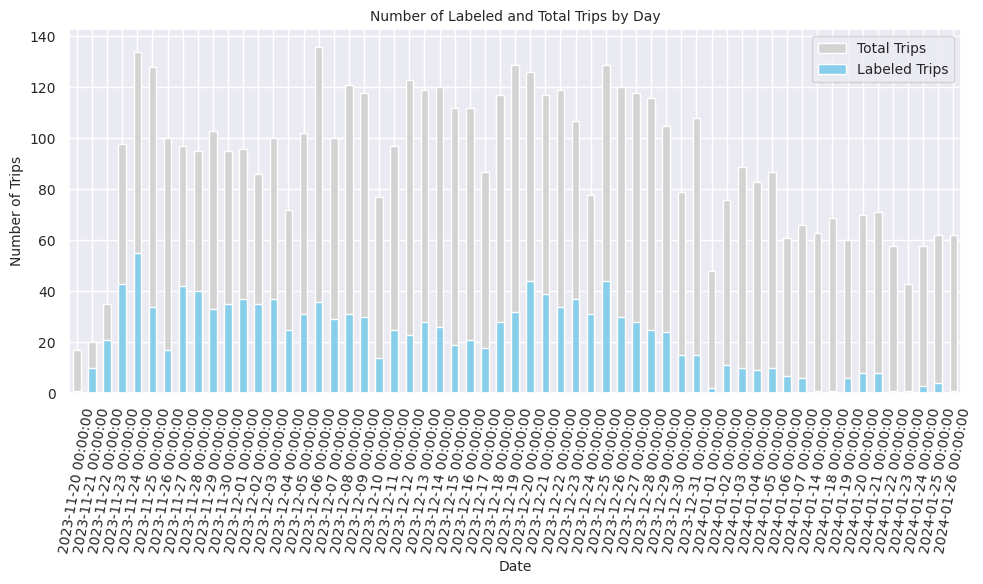

In [13]:
# [11:01 AM] Barry, Sebastian
non_null_trips = expanded_ct.copy()

#limit data range
all_trips = all_trips[all_trips['start_ts'] > 1700438400]
non_null_trips = non_null_trips[non_null_trips['start_ts'] > 1700438400]

#format the dates
all_trips.rename(columns={'start_local_dt_year':'year','start_local_dt_month':'month','start_local_dt_day':'day'}, inplace=True)
all_trips['Date'] = pd.to_datetime(all_trips[['year','month','day']])

non_null_trips.rename(columns={'start_local_dt_year':'year','start_local_dt_month':'month','start_local_dt_day':'day'}, inplace=True)
non_null_trips['Date'] = pd.to_datetime(non_null_trips[['year','month','day']])

 
# Group the data by date and count the number of total trips on each day
total_trips_per_day = all_trips.groupby('Date').size()
 
# Group the non-null trips by date and count the number of trips on each day
non_null_trips_per_day = non_null_trips.groupby('Date').size()
 
# Plot the data
plt.figure(figsize=(10, 6))
total_trips_per_day.plot(kind='bar', color='lightgray', label='Total Trips')
non_null_trips_per_day.plot(kind='bar', color='skyblue', label='Labeled Trips')

plt.title('Number of Labeled and Total Trips by Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

# correlate w/ surveys

In [16]:
surveys = pd.read_csv('PaperVizualizations/USAID-Laos-EV/usaid_laos_ev_demographics.csv')
print(len(surveys), 'surveys')

#drop any null ids
socio_data = surveys[~surveys['user_id'].isnull()]
print(len(socio_data), 'surveys after dropping null ids')

#drop duplicates
socio_data = socio_data.sort_values(by=['user_id', 'data.ts'])
socio_data.drop_duplicates(subset=['user_id'], keep='last', inplace=True)
print(len(socio_data),'surveys', socio_data['user_id'].nunique(), 'users after dropping duplicates')

#prepare survey ids for merging
socio_data['user_id_socio'] = socio_data['user_id'].astype(str)
socio_data['user_id_socio'] = socio_data['user_id_socio'].str.strip() #remove leading or trailing whitespace!!
socio_data['user_id_socio'] = [i.replace('-','') for i in socio_data.user_id_socio]
socio_data['user_id_socio'] = socio_data['user_id_socio']
socio_data = socio_data.drop(labels='user_id', axis=1)

28 surveys
28 surveys after dropping null ids
25 surveys 25 users after dropping duplicates


In [17]:
socio_data = socio_data[socio_data['data.local_dt.timezone'] != 'America/Denver'] #throw out the test codes
print(len(socio_data))
socio_data.user_id_socio.unique()

24


array(['085a73cb74b248b48de698f6a4802f16',
       '138d3b79e9b34e7ebf6398ce92de740e',
       '21e978514a0649c59b5c82aca4dd9aed',
       '428cbafa7be84d62b2cb61356d0f825a',
       '48cfb8eb46eb4c7d80a59b7083b18819',
       '5f10e618935f406590b87e82f4bbc70a',
       '643c5946426f4286ab6af33686b5b840',
       '66e66174e1be4041a126c2237d81b73c',
       '76819ed4ebe44e36bed0698f14ceb90e',
       '78a8d651dc644162ba33ee9a65dfed42',
       '8673748b436c4f148de9dd3c3556690c',
       '8eea92fb616448f094bb37c6ce53e0c8',
       '9ba916cb27b04f76b2c171c88dbf86f7',
       'a0611e292cf346c0bedd8f0b8799a733',
       'a1ae965274764c17a22ff02396e7c620',
       'a74e607e7bb34158a2249c7df6c75f7d',
       'ac08a3e84426449c9719d71209c1cec3',
       'b274a2a592714ee9abb6188ad7227708',
       'ce5b98feaae242ffb4e70bcb0441f372',
       'd6c6cdad4a6c45279eadc91fc3081bac',
       'd8542bcf64d441afaa52f17afd07335b',
       'e8dcb01cbcb0454db67366b046319101',
       'e96caa4c1adc456c88f1f8909a10cc8a',
       'ff8

In [18]:
#prepare trip ids for merging
trips = all_trips.copy()
print(len(trips), 'trips')
print(trips.user_id.nunique(), 'people')
trips['user_id_socio'] = trips.user_id.astype(str)
trips['user_id_socio'] = trips['user_id_socio'].str.strip() #remove leading or trailing whitespace!!
trips.user_id_socio = [i.replace('-','') for i in trips.user_id_socio] # remove all dashes from strings

#merge the data
data = trips.merge(socio_data, on='user_id_socio')
print(len(data), 'trips after merging')
print(data.user_id_socio.nunique(), 'people after merging')
data.user_id_socio.unique()

6936 trips
23 people
6324 trips after merging
22 people after merging


array(['a74e607e7bb34158a2249c7df6c75f7d',
       'ce5b98feaae242ffb4e70bcb0441f372',
       '5f10e618935f406590b87e82f4bbc70a',
       '138d3b79e9b34e7ebf6398ce92de740e',
       'a1ae965274764c17a22ff02396e7c620',
       'ac08a3e84426449c9719d71209c1cec3',
       'b274a2a592714ee9abb6188ad7227708',
       '428cbafa7be84d62b2cb61356d0f825a',
       '8673748b436c4f148de9dd3c3556690c',
       '78a8d651dc644162ba33ee9a65dfed42',
       '66e66174e1be4041a126c2237d81b73c',
       '9ba916cb27b04f76b2c171c88dbf86f7',
       '085a73cb74b248b48de698f6a4802f16',
       'e96caa4c1adc456c88f1f8909a10cc8a',
       '8eea92fb616448f094bb37c6ce53e0c8',
       'ff84c71b55d54267a3697c539ed30755',
       'e8dcb01cbcb0454db67366b046319101',
       'd8542bcf64d441afaa52f17afd07335b',
       '76819ed4ebe44e36bed0698f14ceb90e',
       '48cfb8eb46eb4c7d80a59b7083b18819',
       '643c5946426f4286ab6af33686b5b840',
       '21e978514a0649c59b5c82aca4dd9aed'], dtype=object)

22
6324


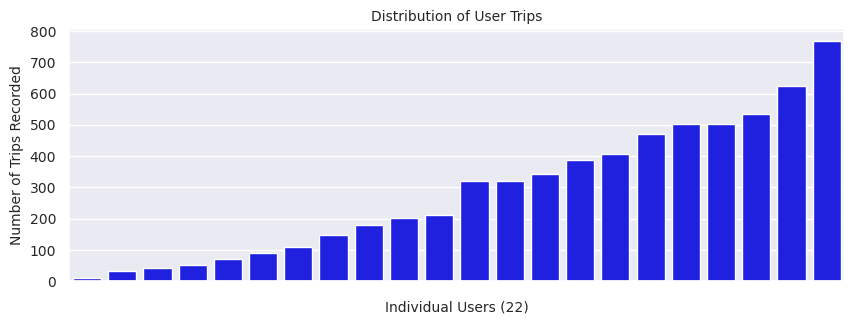

In [19]:
all_user_trips = data.groupby(['user_id'], as_index=False).count()[['user_id','distance']]
print(len(all_user_trips))

data_order = all_user_trips.sort_values('distance', ascending=True).user_id
print(len(data))

plot_title='Distribution of User Trips'
ylab='Number of Trips Recorded'
file_name='CanBikeCO_report_user_participation%s'
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=all_user_trips, x='user_id', y='distance', order=data_order, color='blue').set(title=plot_title,xlabel='Individual Users (22)',ylabel=ylab,xticklabels=[])
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".jpg", bbox_inches='tight')

In [20]:
data['GENDER'] = data['What_is_your_gender']
# labeled_data['GENDER'] = labeled_data['What_is_your_gender']

In [23]:
#prepare trip ids for merging
labeled_trips = expanded_ct.copy()
print(len(labeled_trips), 'trips')
print(labeled_trips.user_id.nunique(), 'people')
labeled_trips['user_id_socio'] = labeled_trips.user_id.astype(str)
labeled_trips['user_id_socio'] = labeled_trips['user_id_socio'].str.strip() #remove leading or trailing whitespace!!
labeled_trips.user_id_socio = [i.replace('-','') for i in labeled_trips.user_id_socio] # remove all dashes from strings

1400 trips
20 people


In [24]:
all_user_trips = data.groupby(['user_id_socio', 'GENDER'], as_index=False).count()[['user_id_socio', 'GENDER','distance']]
print(len(all_user_trips))
# print(labeled_user_trips.program.unique())

# labeled_trips = expanded_ct.copy()
labeled_user_trips = labeled_trips.groupby(['user_id_socio'], as_index=False).count()[['user_id_socio','distance']]
print(len(labeled_user_trips))
# print(labeled_user_trips.program.unique())

plot_data = all_user_trips.merge(labeled_user_trips, how='left', on='user_id_socio').fillna(0)
plot_data.head()

22
20


,user_id_socio,GENDER,distance_x,distance_y
0,085a73cb74b248b48de698f6a4802f16,woman,212,188.0
1,138d3b79e9b34e7ebf6398ce92de740e,man,534,2.0
2,21e978514a0649c59b5c82aca4dd9aed,man,110,13.0
3,428cbafa7be84d62b2cb61356d0f825a,woman,52,0.0
4,48cfb8eb46eb4c7d80a59b7083b18819,woman,180,152.0


In [25]:
plot_data['gender'] = plot_data['GENDER']
plot_data = plot_data[plot_data['gender'] != 0]

22


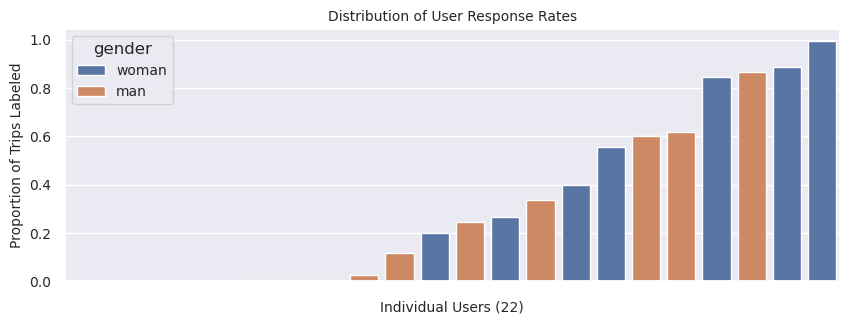

In [26]:
plot_data['proportion'] = plot_data['distance_y'] / plot_data['distance_x']
data_order = plot_data.sort_values('proportion', ascending=True).user_id_socio
print(len(plot_data))

plot_title='Distribution of User Response Rates'
ylab='Proportion of Trips Labeled'
file_name='CanBikeCO_report_user_participation%s'
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=plot_data, x='user_id_socio', y='proportion', hue='gender', order=data_order, dodge=False).set(title=plot_title,xlabel='Individual Users (22)',ylabel=ylab,xticklabels=[])
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".jpg", bbox_inches='tight')